# Sage Introduction

This document aims to give a crash-course to Sage. There are many additional resources for help, including the built-in documentation (discussed below), the [**official Sage tutorial**](https://doc.sagemath.org/html/en/tutorial/index.html), and the (highly recommended) open textbook [**Computational Mathematics with SageMath**](http://sagebook.gforge.inria.fr/english.html).

Sage is free and open source. Information on running a local installation can be found on the [**Sage installation guide**](https://doc.sagemath.org/html/en/installation/index.html). Alternatively, Sage can be run "in the cloud" by making a (free) account on the [**CoCalc website**](https://cocalc.com/) or by uploading a Jupyter notebook to a public git repository and using [**mybinder.org**](https://mybinder.org).

This document is written as a **Jupyter notebook**, the most common (and convenient) way to write and execute Sage code. A notebook is composed of *cells*. Most of the cells in this notebook consist of an Input section (containing Sage code) and (potentially) an output section (containing the result of evaluating that Sage code) $-$ some code cells simply perform a computation without returning anything (for instance, updating the values of variables). A few cells (including the current one) consist of formatted text and $\rm\LaTeX$ equations, written using the Markdown markup language. A third type of cell contains plain, unformatted text.

**To execute a piece of Sage code, click on the Input section of the corresponding code cell and hit Shift + Enter (only hitting Enter simply adds a new line). The reader should execute each statement as they work through the notebook, and is encouraged to modify the code and play around as they go. Note that skipping a cell may result in errors when later cells are executed (for instance, if one skips a code block defining a variable and later tries to run code calling that variable).** To add a new cell, click to the left of any cell and press the "a" key (to insert above) or the "b" key (to insert below). To delete a cell, click to the left of a cell and press the "d" key twice. These (and other) tasks can also be accomplished through the menu bars at the top of the page.

This introduction is based off of a worksheet originally written by [Steven Melczer](https://melczer.ca/).

### Part 1: The Basics of Sage

We begin with an explanation of arithmetic in Sage, if statements, for and while loops, and Sage functions (in the programming sense; symbolic mathematical functions are described in Part 2 below).

In [1]:
# Any text on a line after a '#' symbol is considered a comment, and is not evaluated by Sage
# Sage can be used as a calculator using usual math notation 
# (recall you need to click on a cell and hit Shift + Enter to evaluate it)
1 + 3*4

13

In [2]:
# Code in a Sage cell should be entered in sequence, with one "instruction" per line
# (multiple instructions can be put on the same line using a semicolon -- see examples below)
# The result of previous executions of Sage cells (both the current cell and other cells) is stored by Sage
# All (non-commented) code is executed, however only the output of the final line is printed by default
1 + 2
2 ^ 3

8

In [3]:
# Variables are defined using the "=" operator
# Note that some operations (such as variable assignment) do not have an output
# So we add another line to print the value of our variable
mult = 11 * 12
mult

132

In [4]:
# randint(a, b) returns a random integer between a and b inclusive
A = randint(0, 10^9)
B = randint(0, 10^9)
A+B

1096044431

In [5]:
# Sage can compute with large integers
A*B

292386115536100384

In [6]:
# Even very large integers can be computed exactly
A^100

148624511468696677191310049841171261414886773347521263616599074724075973718267232888231300772533243543280595851527344107109967842627264469403970050504677163772486503273996643956823916265376912793629440933391169259195646411579698941751176405879553399499775895227733590023938894758921347858522023122607754640333028086501802965020164154047488374963665398075500617053996136843163620220907252586516910369374358228902715000872666566005792665326458811687118611067938743989203792839948065397103874053967882679137465371819471002755780161002517712479635361983378878370660292358983257229632274766628094272965765432530156019146713826577502067071946106337128138594323955216308518332232721777589333604700088411369241981203558947854913225423240237493450899664640313303602369027986109281552590685862285308077575448446465671552531294073967763096418857745838904120565703030968864997376

In [7]:
# To print other lines, use the print command
print(2^3) # This is an integer
print(3/9) # This is an exact rational number
print(3.0/9.0) # This is a floating point number
print(11 % 3) # This is 11 mod 3

8
1/3
0.333333333333333
2


In [8]:
# Multiple instructions can be put on the same line using a semicolon
# Again, only the output of the final line is displayed by default
2+2; print(1+2); 3*5

3


15

In [9]:
# The "show" command outputs a latex-like pretty output
# Sage knows common math constants such as pi (lower case), e, and I (or the alternative i)
# Most common mathematical functions are supported by default
show(5/10 + 1/pi)
show(sin(pi/3))
show(log(2))
show(log(2).n(1000)) # Adding ".n()" gives a numerical approximation (can use ".n(k)" to get k bits)
show(exp(i*2*pi/3))
show(exp(I*2*pi/101))

1/pi + 1/2

1/2*sqrt(3)

log(2)

0.693147180559945309417232121458176568075500134360255254120680009493393621969694715605863326996418687542001481020570685733685520235758130557032670751635075961930727570828371435190307038623891673471123350115364497955239120475172681574932065155524734139525882950453007095326366642654104239157814952043740

1/2*I*sqrt(3) - 1/2

e^(2/101*I*pi)

In [10]:
# Sage computes with *exact* rational numbers
# For example, the following computes the sum of 1 + 1/2 + ... + 1/100
show(add(1/n for n in (1..100)))

14466636279520351160221518043104131447711/2788815009188499086581352357412492142272

In [11]:
# Sage also has support for matrices and vectors
A = random_matrix(ZZ, 5)
b = random_vector(ZZ, 5)
show(A)
show(b)

[  1  -1   1  -1   5]
[ -5  -1   1  87  -1]
[  2  -1   0   4   3]
[ -1   4  -1   1  -3]
[  1   0  -1 -19  -1]

(-1, 3, 1, 0, -1)

In [12]:
# Sage can solve the linear system Ax = b for x using the solve_right method of matrices
# (named because x appears to the right of A in the system to solve)
show(A.solve_right(b))

(238/165, 23/165, 883/660, 21/220, -39/55)

In [13]:
# There are many useful built-in functions on matrices (e.g., to compute the determinant)
A.determinant()

1320

In [14]:
# Sage can even deal with matrices with symbolic entries
B = Matrix(SR, A)
B[4,4] = x
show(B)
show(B.solve_right(b))

[  1  -1   1  -1   5]
[ -5  -1   1  87  -1]
[  2  -1   0   4   3]
[ -1   4  -1   1  -3]
[  1   0  -1 -19   x]

(338/25/(5*x + 16) + 16/75, 26/5/(5*x + 16) - 1/3, 3107/100/(5*x + 16) - 223/150, 39/100/(5*x + 16) + 3/50, -39/5/(5*x + 16))

In [15]:
# Mathematical objects and variables can be inserted in print commands using commas, 
# or using empty curly braces {} and .format(math1,math2,...)
print("The area of a circle of radius 1 is approximately", pi.n())
print("The square-root of {} is approximately {}".format(log(2), sqrt(log(2)).n()))

The area of a circle of radius 1 is approximately 3.14159265358979
The square-root of log(2) is approximately 0.832554611157698


In [16]:
# To access the help page for a function, type the name of the function and then add a question mark
# For instance, evaluating the expression "sin?" (without quotes) gives the help page for sine
# THIS WILL OPEN A NEW WINDOW AREA
# Using two question marks (e.g. "sin??") shows the source code of the function
# (Note that for many low level functions like sin Sage relies on outside packages 
# and the source code is not very informative)

# Similar information is provided by the "help" command, which prints below the current cell
print?

In [17]:
# The values "_", "__", and "___" (using one, two, and three underscores) 
# are the last three output values. Printing displays content but does *not* 
# return a value, so a block ending with a print statement has no output
print(_)
print(__)

1320
15


In [18]:
# The output of previous cells can be directly accessed using the syntax Out[k]
# NOTE: cells are numbered by execution order --  running cells repeatedly or in 
# different orders will change their numbering!
Out[13]

1320

In [19]:
# Sage is built on Python, and uses much of the same syntax. 
# In particular, indentation is extremely important.
# If statements are defined with indentation
a = 2

if a<0:
    print("Negative")
elif a==0:
    print("Zero")
else:
    print("Positive")

Positive


In [20]:
# In addition, an if statement can be written in one line
a = 2
if a>0: print("Positive")

Positive


In [21]:
# Functions are also defined with indentation
def fact(n):
    if n==0:
        return 1
    else:
        return n*fact(n-1)

print(fact(4))
print(fact(10))
print(fact) # Prints reference to the function

24
3628800
<function fact at 0x7f5d1d628790>


In [22]:
# running this code displays the source code for the function fact
fact??

In [23]:
# Lists in Sage are defined with square brackets
LST = [1,2,3,4]

print(LST)
print(len(LST)) # Print the length of the list
print(LST[0]) # Access elements from the left (starting at index 0)
print(LST[1]) # Print second element of the list
print(LST[-2]) # Negative indices access elements from the right
print(LST[1:3]) # Define sublist
print(LST[1:-1]) # Define sublist using negative index
print(LST[1:]) # Define sublist from a fixed index to end of list

[1, 2, 3, 4]
4
1
2
3
[2, 3]
[2, 3]
[2, 3, 4]


In [24]:
# Lists can be concatenated with '+'
# Strings can be concatenated similarly (they are lists of characters)
print([1,2,3] + ["a","b","c"])
print("hello" + " " + "world")

[1, 2, 3, 'a', 'b', 'c']
hello world


In [25]:
# For loops work over lists or generators, and are indented similarly to if statements and functions
LST = [0,1,2,3,4,5]
for k in LST:
    print(k^2)

0
1
4
9
16
25


In [26]:
# The notation a..b can be used to build the list of numbers between integers a and b
for k in (0..6):
    print(k^2)

0
1
4
9
16
25
36


In [27]:
# As in Python, Sage contains the function range(k), which encodes the numbers 0,1,...,k-1
# In Sage versions 8.x and lower, which rely on Python 2, range(k) returns the list [0,1,...,k-1]
# In Sage 9.0 and higher, which use Python 3, range(k) returns an *iterator* that can be converted to a list
# (think of an iterator as a method to construct elements of a list, one by one, which can be more efficient)
# We assume in our discussions that the user of this document is using Sage 9.0 or higher
# More details on this change can be found here: https://docs.python.org/3.0/whatsnew/3.0.html#views-and-iterators-instead-of-lists

print(range(5)) # printing an iterator just returns the iterator
print(list(range(5))) # the iterator can be converted to a regular list
for k in range(5): # loops can range directly over iterators, which can be more efficient
    print(k^2)

range(0, 5)
[0, 1, 2, 3, 4]
0
1
4
9
16


In [28]:
# For loops can also be defined over one line
for k in range(5): print(k^2)

0
1
4
9
16


In [29]:
# There is a powerful alternate syntax for building lists using a 
# function f(x) on the elements of a list LST: [f(k) for k in LST]
print([k^2 for k in range(5)])
print([cos(k*pi) for k in [1..5]])

[0, 1, 4, 9, 16]
[-1, 1, -1, 1, -1]


In [30]:
# While loops are defined similarly to for loops
k = 0
while k<5:
    print(k^2)
    k = k+1

0
1
4
9
16


In [31]:
# While loops can be broken using 'break'
k = 0
while True:
    if k>= 5:
        break
    print(k^2)
    k = k+1

0
1
4
9
16


In [32]:
# The map operator applies a function to each element of a list 
# Similar to range, in Sage 9.0+ map returns a "map object" / iterator
# The list command can be used to obtain an honest list from a map object
list(map(abs,[-1,2,-3,4]))

[1, 2, 3, 4]

In [33]:
# User defined functions can also be mapped, where appropriate
def double(k):
    return 2*k

list(map(double,[-1,2,-3,4]))

[-2, 4, -6, 8]

In [34]:
# Can also use map with 'lambda expressions' to define a function in place
print(list(map(lambda t: t*2, [-1,2,-3,4])))
print(lambda t: t^2) # Defines the function f(x) = x^2 in place

[-2, 4, -6, 8]
<function <lambda> at 0x7f5d1d62beb0>


In [35]:
# Can filter a list using 'filter'
# Similar to range and map, in Sage 9.0+ filter returns a "filter object" / iterator
# The list function can be applied to obtain an honest list from a filter object

print(list(filter(lambda t: t>0, [-1,2,-3,4])))

[2, 4]


In [36]:
# Can also use the list 'comprehension form' to filter elements when building a list
[p^2 for p in [1..10] if is_prime(p)]

[4, 9, 25, 49]

In [37]:
# Can sort lists, when appropriate.
# Sort is a function of a list (see Part 2 below for additional details)
L = [1,4,3,2,7,6]
L.sort() # Modifies the list L in place
print(L)
L = ["a","acb","abc","ab"]
L.sort() # Sort in lexicographical order
print(L)

[1, 2, 3, 4, 6, 7]
['a', 'ab', 'abc', 'acb']


In [38]:
# Lists are stored by reference. Simply writing L2 = L1, makes L1 and L2 point to the *same* list
# Use L2 = copy(L1) to make an independent copy
# Note copy only works at one level of lists 
# (use the "deepcopy" command to copy a list of lists, and make everything independent)

L1 = [1,2,3]
L2 = L1 # L2 points to the same list as L1
L3 = copy(L1) # L3 points to a new list, initialized with the same values as L1
L2[0]=-1
print(L1); print(L2); print(L3)

[-1, 2, 3]
[-1, 2, 3]
[1, 2, 3]


In [39]:
# Note that the concatenation operator creates a *new* list, so in the following L1 and L2 are separate
L1 = [1,2,3]
L2 = L1 + [4]
print(L1); print(L2)

[1, 2, 3]
[1, 2, 3, 4]


In [40]:
# Beware of the following code that creates the list [0,1,2,...,99]
# It does so very inefficiently, as a new list is created every loop iteration
L = []
for i in range(100):
    L = L + [i]
print(L)
# Instead, replace the loop body with L.append(i) or L += [i]
# This will do the same thing while only creating a single list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


### Part 2: The Symbolic Ring and Sage Types

We now see how to manipulate symbolic variables and abstract functions, including basic calculus operations and plotting, and how to determine the type and parent of an object.

In [41]:
# Before running this section, we reset all variables
reset()

In [42]:
# By default, when opening a notebook the variable "x" can be used to define a symbolic function / expression
poly = x^2 - 1
print(poly)

x^2 - 1


In [43]:
# Using any other (undeclared) variable will give an error
# This behaviour can cause frustration for first-time Sage users
poly2 = y^2 - 1

NameError: name 'y' is not defined

In [44]:
# You can "undeclare" a variable with the restore command
restore(x)
# This will now cause an error
show(x)

TypeError: 'sage.symbolic.expression.Expression' object is not iterable

In [45]:
# If the variable x is assigned a different value, this does not change the value of our symbolic expression!
# However, any new expressions containing x will use the updated value of x.
x = 2
print(poly)
poly2 = x^2 - 1
print(poly2)

x^2 - 1
3


**MAKE SURE YOU UNDERSTAND THIS CRUCIAL POINT: 
This behaviour occurs because *Sage variables* (for instance, x on the left hand side of x = 2) are distinct from the underlying *symbolic variables* used to define symbolic expressions. By default the *Sage variable* x is initialized to a *symbolic variable* "x", and the expression poly above is defined in terms of this *symbolic variable*. Changing the *Sage variable* x to a new value does nothing to the underlying symbolic variable "x", which is why the value of poly does not change after setting x = 2.**

In [46]:
# The easiest way to define a new symbolic variable having
# the same name as a Sage variable is with the "var" command
x = 2
print(x) # Prints the value of the Sage variable x
var('x') # Makes the Sage variable x point to the symbolic variable "x"
print(x) # Prints the value of the Sage variable x, which is now the symbolic variable "x"

2
x


In [47]:
# Multiple variables can be defined at the same time
var('a b c') # Initialize Sage variables a, b, and c to symbolic variables "a", "b", and "c"
poly2 = (a + b*c)^2
print(poly2)

(b*c + a)^2


In [48]:
# The commands "type" and "parent" illustrate the domains in which Sage objects live.
# Symbolic expressions, defined with symbolic variables, live in the Symbolic Ring.
# Sage automatically determines where objects defined with "=" should live.
var('a')
poly = a
print(type(poly))
print(parent(poly))

<class 'sage.symbolic.expression.Expression'>
Symbolic Ring


In [49]:
# Some additional examples
poly = 10
print(type(poly))
print(parent(poly))
print(type(1/2))
print(parent(1/2))
print(type(0.5))
print(parent(0.5))

<class 'sage.rings.integer.Integer'>
Integer Ring
<class 'sage.rings.rational.Rational'>
Rational Field
<class 'sage.rings.real_mpfr.RealLiteral'>
Real Field with 53 bits of precision


In [50]:
# In Sage (as in Python) objects can have their own functions
# Type "poly2." (without quotes) then hit the *Tab* key to see the available functions for poly2
# Run the command "poly2.subs?" to see the help page for the function poly2.subs
# Run the command "poly2.subs??" to see the source code for the function poly2.subs
var('a b c')
poly2 = (a + b*c)^2
print(poly2.subs(a=1,b=2,c=3))
print(poly2.subs)
print(parent(poly2.subs))

49
<built-in method substitute of sage.symbolic.expression.Expression object at 0x7f5d1f7e2940>
<class 'builtin_function_or_method'>


In [51]:
# Sage has many commands for manipulating expressions, such as simplify and expand.
# Be careful -- in the Symbolic Ring, Sage simplifies without checking restrictions on variables
var('x')
print(((x-1)*(x+1)/(x-1)).simplify())
print(simplify((x-1)*(x+1)/(x-1))) # simplify(p) is a built-in shortcut for type(p).simplify()

x + 1
x + 1


In [52]:
# Expanding an expression
print(expand((x-1)*(x+1)))

x^2 - 1


In [53]:
# Factoring an expression
pol = x^2-1
print(pol.factor())

(x + 1)*(x - 1)


In [54]:
# Factoring a larger expression
f = x^23-x^16-2*x^13+3*x^20-2*x^10+2*x^11-2*x^4+2*x+5*x^3-5
show(f)
show(f.factor())

x^23 + 3*x^20 - x^16 - 2*x^13 + 2*x^11 - 2*x^10 - 2*x^4 + 5*x^3 + 2*x - 5

(x^13 + 3*x^10 + 2*x - 5)*(x^10 - x^3 + 1)

In [55]:
# Equations are also symbolic expressions, defined using "=="
eq1 = (x^3 == 1)
print(eq1)
print(eq1.lhs())
print(eq1.rhs())

x^3 == 1
x^3
1


In [56]:
# The solve command works with equations
show(solve(eq1, x))

[x == 1/2*I*sqrt(3) - 1/2, x == -1/2*I*sqrt(3) - 1/2, x == 1]

In [57]:
# Symbolic functions can be defined with symbolic variables
f = sin(x)+2*cos(x)
show(f)

2*cos(x) + sin(x)

In [58]:
# You can also define f in a "callable" format
f(x) = sin(x)+2*cos(x)

This format allows you to specify the order of the arguments if you want to call a multivariate function, e.g., `F(x, y, z) = sin(x) + 2*cos(y) + 3*z`.

In [59]:
# The find_root command can be used to approximate roots numerically
# (additional details on finding roots of polynomials are given in the next section)
f(x).find_root(-10, 10)

8.31762924297529

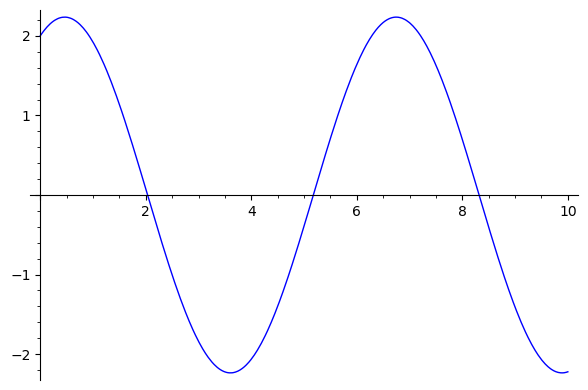

In [60]:
# Symbolic functions can be plotted with the plot command
plot(f(x),x,0,10) # Syntax is "plot(function, variable, xmin value, xmax value)"

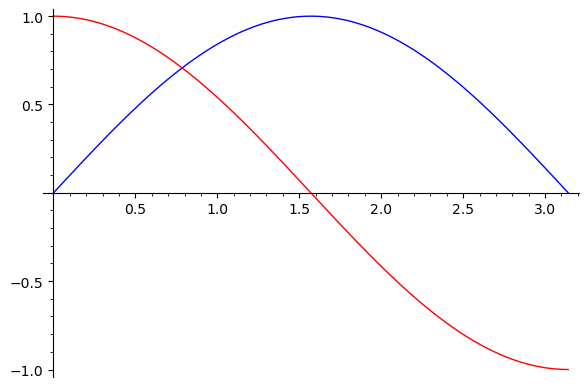

In [61]:
# Plots can be "added" to overlap -- run "plot?" or "help(plot)" for plotting options
p1 = plot(sin(x),x,0,pi)
p2 = plot(cos(x),x,0,pi,color="red")
p1+p2

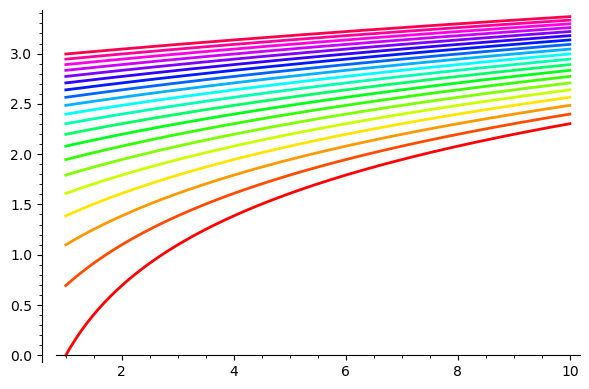

In [62]:
# Common plot options include
# plot_points (default 200)
# xmin and xmax
# color
# detect_poles (vertical asymptotes)
# alpha (line transparency)
# thickness (line thickness)
# linestype (dotted with ':', dashdot with '-.', solid with '-')
# Use commands list p.set_aspect_ratio, etc.

pp = plot([]) # Define empty plot
cols = rainbow(20) # Define 20 evenly spaced colors
for k in range(20):
    pp = pp + plot(log(x+k),1,10,color=cols[k],thickness=2)

pp # Print superimposed graphs

In [63]:
# 3d plots are similar (user may need to load the 3D viewer after running this code)
var('x y')
f(x,y) = x^2 + sin(x)*cos(y)
plot3d(f, (x,-1,1), (y,-1,1))

Graphics3d Object

In [64]:
# The series command computes power series of symbolic expressions representing functions
show(log(1/(1-x)).series(x,10))

1*x + 1/2*x^2 + 1/3*x^3 + 1/4*x^4 + 1/5*x^5 + 1/6*x^6 + 1/7*x^7 + 1/8*x^8 + 1/9*x^9 + Order(x^10)

In [65]:
# The series command can also compute Laurent series
show(tan(x).series(x==pi/2,10))

(-1)*(-1/2*pi + x)^(-1) + 1/3*(-1/2*pi + x) + 1/45*(-1/2*pi + x)^3 + 2/945*(-1/2*pi + x)^5 + 1/4725*(-1/2*pi + x)^7 + 2/93555*(-1/2*pi + x)^9 + Order(1/1024*(pi - 2*x)^10)

Some methods available to symbolic expressions may not be available for symbolic series as they are of the type "symbolic series" rather than "symbolic expressions".

In [66]:
# To go from a series expression to the polynomial defined by its terms, use the truncate command
show(arctan(x).series(x,10))
show(arctan(x).series(x,10).truncate())

1*x + (-1/3)*x^3 + 1/5*x^5 + (-1/7)*x^7 + 1/9*x^9 + Order(x^10)

1/9*x^9 - 1/7*x^7 + 1/5*x^5 - 1/3*x^3 + x

Sage can also compute derivates, integrals, and limits from Calculus such as:

$$ \renewcommand{\d}{\mathrm{d}}\frac{\d}{\d x}\sin x \qquad \int \sin(x) \cos(x) \,\d x \qquad \int_{-\infty}^\infty e^{-x^2}\,\d x \qquad \lim_{x\to0}\frac{\sin x}{x} $$

In [67]:
# The diff/differentiate command computes derivatives
# The integral/integrate command is similar
show(diff(sin(x),x))
show(integrate(sin(x)*cos(x),x))
show(integrate(exp(-x^2),x,-infinity,infinity))
show(limit(sin(x)/x,x=0))

cos(x)

-1/2*cos(x)^2

sqrt(pi)

1

In [68]:
# This also works with abstract symbolic functions
var('x y')
function('f')(x)
show(diff(sin(f(x)),x,x))
function('g')(x,y)
show(diff(g(sin(x),f(x)),x))

-sin(f(x))*diff(f(x), x)^2 + cos(f(x))*diff(f(x), x, x)

cos(x)*D[0](g)(sin(x), f(x)) + diff(f(x), x)*D[1](g)(sin(x), f(x))

In [69]:
# Here we set up and solve a differential equation
x = var('x')
y = function('y')(x)
show(desolve(y*diff(y,x) == x, y))

1/2*y(x)^2 == 1/2*x^2 + _C

Sage can even find closed-form expressions of some interesting sums such as these:

$$ \sum_{k=0}^n a^k \qquad \sum_{k=0}^n \binom{n}{k} \qquad \sum_{n=1}^\infty \frac{1}{n^2}  $$

In [70]:
# Sage can calculate some symbolic sums
var('a k n')
show(sum(a^k,k,0,n))
show(sum(binomial(n,k), k, 0, n))
show(sum(1/n^2, n, 1, infinity))

(a^(n + 1) - 1)/(a - 1)

2^n

1/6*pi^2

In [71]:
# You can use the assume to command to put restrictions on variables
# This can be useful for infinite series
# Just running sum(a^k,k,0,infinity) throws a "ValueError" -- need to *assume* |a|<1
assume(abs(a)<1)
show(sum(a^k,k,0,infinity))

-1/(a - 1)

In [72]:
# Assumptions stay with variables until cleared using forget
# Run this cell directly after the previous cell
print(bool(a<1)) # Test if a < 1, under assumption abs(a) < 1
forget(abs(a)<1)
print(bool(a<1)) # Test if a < 1, under no assumptions

True
False


In [73]:
################################################
# EXERCISE: Make a function to compute the nth Fibonacci number (defined by fib(n+2) = fib(n+1) + fib(n),
# fib(0) = 0, and fib(1) = 1). What is the highest number you can compute in 5 seconds?
#
# Adding the line "@cached_function" directly before the function definition tells Sage to store the 
# result of each function return, which will speed up the computation. Add this line then see how high
# you can go in 5 seconds.
################################################


In [74]:
################################################
# EXERCISE: Compute the sum of the first 100 positive perfect squares. 
# (Use the add function -- type "add?" or "help(add)" for its documentation)
################################################


In [75]:
################################################
# EXERCISE: Create a list containing the first 100 primes of the form 4*k+1
################################################


In [76]:
################################################
# EXERCISE: Guess the result of uncommenting and running the following code.
# Explain the output that does occur.
################################################
# var('p q r'); r = q; q = p; p = r
# print(p); print(q); print(r)

In [77]:
################################################
# EXERCISE: Uncomment and hit <Tab> with the cursor on the far right of the following line see the
# available functions for poly2 which begin with "s". Select one of the functions, look up its
# documentation, then run the function (with appropriate arguments if necessary)
################################################
# poly2.s